In [1]:
from Analyzor.DataFactory import DataFactory
from Analyzor import VertexAnalyzor
import pylab as plt
import matplotlib.path as mplPath
import seaborn as sns
import numpy as np
import matplotlib.patches as patches
import cv2

from PIL import Image
from PIL import ImageDraw
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 20)


In [2]:
dp = DataFactory('data/SQL/10C/0085_0005.db','data/SQL/10C/ProtoMap.db')
dp.InitT3()

0085_0005 initialization will take some time
0085_0005loading finished
0085_0005 begin processing
0085_0005 processing finished


[[340 164]
 [195  88]
 [370 146]] 356 153
([(34.5085229876684, 19.4164878389476), (21.98524558121003, 173.62603491412224), (153.43494882292202, 15.652475842498529)], 15.652475842498529)


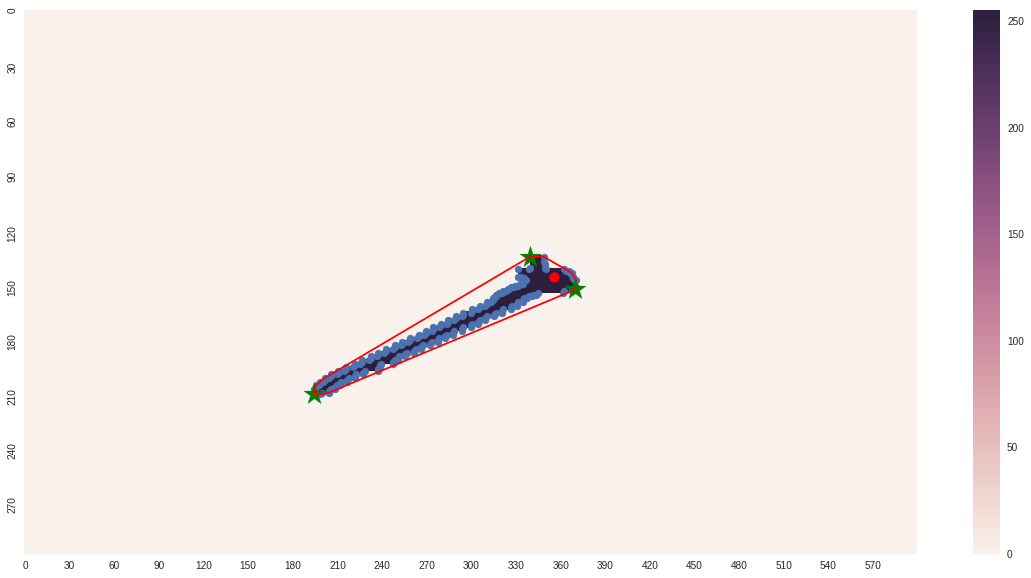

In [24]:


fig = plt.figure(figsize=(20,10))

image = dp.ConstructImage(16)
image = VertexAnalyzor.FilterBackground(image)
points,(xc,yc) = VertexAnalyzor.GetEventPositions(image,1)

print points,xc,yc
r = VertexAnalyzor.GetEventInfo(points,(xc,yc))
plt.scatter(xc,yc,s=100,c='r')
print r

In [ ]:
pic_ = np.copy(image)
points = VertexAnalyzor.TipFinder(pic_,1)

In [ ]:
def VertexPos1(image_,ps):
    ys,xs = np.where(image_)
    results = []

    def Error(xs,ys,xc,yc,ps):

        xc,yc = float(xc),float(yc)
        ps = ps.astype(np.float)

        def GetDist(xs,ys,xm,ym):
            Dist = np.ones(xs.shape[0])*1e5
            
            if abs(xc-xm)<0.1: 
                idx = np.where((ys-yc)*(ym-yc)>=0)
                Dist[idx] = np.abs(xs[(ys-yc)*(ym-yc)>=0]-xc)
            else:
                k = (yc-ym)/(xc-xm)
                b = (xc*ym-yc*xm)/(xc-xm)

                Di = xs-xc+k*ys-k*yc
                Di_ = xm-xc+k*ym-k*yc

                idx = np.where(Di*Di_>=0)

                Dist[idx] = np.sqrt(np.power(xs[idx]*k+b-ys[idx],2)/(k*k+1))

            return Dist

        Dist = [GetDist(xs,ys,xm,ym) for xm,ym in ps]

        return np.sum(np.min(np.stack(Dist),axis=0))

    #print Error(xs,yc,262.0, 115.0)

    '''
    plt.imshow(image_)
    path1 = mplPath.Path(ps[[0,1,2,0]])
    
    patch = patches.PathPatch(path1, facecolor='orange', lw=2)
    #plt.scatter(*points.T)
    #plt.gca().add_patch(patch)

    x = range(0,500)
    y = range(0,300)

    xv, yv = np.meshgrid(x, y)
    xv, yv = xv.reshape(-1), yv.reshape(-1)

    pix = np.stack([xv,yv]).T
    mask = path1.contains_points(pix)
    print xs.shape
    res = []
    #for x_,y_ in pix[mask]:
    for x_,y_ in [(262, 115),(350,150)]:
        err = Error(xs,ys,x_,y_)
        print err
        res.append((x_,y_,err))
    '''
    #return sorted(res,key=lambda x:x[2])[:30]


VertexPos1(image,points.astype(np.float))


ps = points.astype(np.float)

def Error(xs,ys,xc,yc):

    print xs.shape
    def GetDist(xm,ym):
        if abs(xc-xm)<1e-1: return np.abs(xs-xc)

        k = (yc-ym)/(xc-xm)
        b = (xc*ym-yc*xm)/(xc-xm)

        return np.sqrt(np.power(xs*k+b-ys,2)/(k*k+1))

    Ds = [GetDist(xm,ym) for xm,ym in ps]

    return np.sum(np.min(np.stack(Ds),axis=0))

print Error(xs,ys,262.0, 115.0)


#plt.scatter(243, 144,s=400)

In [ ]:
image_ = np.copy(image)
#image_[:,220:]=0
ys,xs = np.where(image_)
results = []

ps = points.astype(np.float)

def Error(xs,ys,xc,yc):

    def GetDist(xm,ym):
        if xc == xm: return np.abs(xs-xc)
        
        k = (yc-ym)/(xc-xm)
        b = (xc*ym-yc*xm)/(xc-xm)

        return np.sqrt(np.power(xs*k+b-ys,2)/(k*k+1))

    Ds = [GetDist(xm,ym) for xm,ym in ps]
    
    return np.min(np.stack(Ds),axis=0)





r = np.zeros([300,500])
for dx in np.arange(0,500):
    for dy in np.arange(0,300):
        
        r[dy,dx] = sum(Error(xs,ys,dx,dy))


In [ ]:
print points
plt.figure(figsize=(20,20))
plt.imshow(np.log(np.log(np.log(r+1)+1)+1), cmap='Greys')

In [ ]:

ps = points.astype(np.float)

def Error(xs,ys,xc,yc):

    def GetDist(xm,ym):
        if abs(xc-xm)<1e-1: return np.abs(xs-xc)

        k = (yc-ym)/(xc-xm)
        b = (xc*ym-yc*xm)/(xc-xm)

        return np.sqrt(np.power(xs*k+b-ys,2)/(k*k+1))

    Ds = [GetDist(xm,ym) for xm,ym in ps]

    return np.sum(np.min(np.stack(Ds),axis=0))

print Error(xs,ys,350.0, 145.0)


In [ ]:
ys,xs = np.where(image_)
hull = VertexAnalyzor.convexHull(image_)
#path1 = mplPath.Path(points[[0,1,2,0]])
path1 = mplPath.Path(hull[:,0,:])

pp = np.stack([xs,ys]).T
mask = path1.contains_points(pp)
plt.scatter(*pp[mask].T)


In [ ]:


image,ps = GenerateData()

fig = plt.figure(figsize=(20,10))

#image = dp.ConstructImage(15)
#image = VertexAnalyzor.FilterBackground(image)
points = VertexAnalyzor.TipFinder(np.copy(image),1)
#points,(xc,yc) = VertexAnalyzor.GetEventPositions(image,1)
#xc,yc = VertexPos1(image,ps[1:])
xc,yc = VertexPos1(image,points.astype(np.float))
#r = VertexAnalyzor.GetEventInfo(points,(xc,yc))
plt.scatter(xc,yc,s=100,c='r')

print points
print ps[1:]